In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [95]:
raw_observations = pd.read_csv("observations_train.csv")
raw_series = pd.read_csv("series.csv")
raw_observations.loc[raw_observations.series_id == "SP500"].head()

,series_id,date,value
84020,SP500,02-14-2011 00:00:00,1332.32
84021,SP500,02-15-2011 00:00:00,1328.01
84022,SP500,02-16-2011 00:00:00,1336.32
84023,SP500,02-17-2011 00:00:00,1340.43
84024,SP500,02-18-2011 00:00:00,1343.01


In [97]:
raw_series.series_id.unique()

array(['AAA10Y', 'ASEANTOT', 'BAA10Y', 'BUSAPPWNSAUS', 'BUSAPPWNSAUSYY',
       'CBUSAPPWNSAUS', 'CBUSAPPWNSAUSYY', 'CUUR0000SA0R', 'DEXCHUS',
       'DEXJPUS', 'DEXUSEU', 'DEXUSUK', 'DFII10', 'DFII20', 'DFII30',
       'DFII5', 'DFII7', 'DLTIIT', 'DPCREDIT', 'DPRIME', 'EECTOT', 'EFFR',
       'EFFRVOL', 'FRGSHPUSM649NCIS', 'GVIPT50002S', 'GVIPT50030S',
       'GVIPT51000S', 'GVIPT51100S', 'GVIPT51110S', 'GVIPT51120S',
       'GVIPT51200S', 'GVIPT52000S', 'GVIPT52100S', 'GVIPT521A3S',
       'GVIPT52300S', 'GVIPT54000S', 'GVIPT54100S', 'GVIPT54200S',
       'GVIPT54220S', 'INFECTDISEMVTRACKD', 'IOER', 'IORR',
       'MEDCPIM158SFRBCLE', 'MORTGAGE15US', 'MORTGAGE30US', 'OBFR',
       'OBFRVOL', 'PCUADLVWRADLVWR', 'PCUAINFOAINFO', 'PCUAMUMAMUM',
       'PCUARETTRARETTR', 'PCUASHCASHC', 'PCUASTDSVASTDSV',
       'PCUATRADEATRADE', 'PCUATRANSATRANS', 'PCUATRNWRATRNWR',
       'PCUATTDSVATTDSV', 'PCUAWHLTRAWHLTR', 'PCUOMFGOMFG', 'PCUOMINOMIN',
       'SFTPAGRM158SFRBSF', 'SOFR', 'SOFRVOL', 

In [63]:
raw_observations['date'] = pd.to_datetime(raw_observations.date)

<AxesSubplot:xlabel='date'>

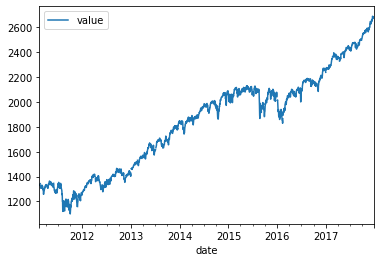

In [65]:
AAA = raw_observations.loc[raw_observations.series_id == 'AAA10Y']
SP500 = raw_observations.loc[raw_observations.series_id == 'SP500']
SP500.plot("date")

In [90]:
model = Prophet()

In [91]:
features = pd.DataFrame({'ds': SP500.iloc[:-200].date, 'y': SP500.iloc[:-200].value})
model.fit(features)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [92]:
future = model.make_future_dataframe(periods=200)
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1790,2017-10-06,2498.565178,2374.870348,2543.645854,2434.921869,2568.260220,-41.048626,-41.048626,-41.048626,-0.019951,-0.019951,-0.019951,-41.028674,-41.028674,-41.028674,0.0,0.0,0.0,2457.516552
1791,2017-10-07,2499.408449,2379.788216,2552.034928,2435.068351,2569.493488,-40.490826,-40.490826,-40.490826,0.493811,0.493811,0.493811,-40.984637,-40.984637,-40.984637,0.0,0.0,0.0,2458.917623
1792,2017-10-08,2500.251719,2380.214943,2543.292013,2435.022265,2570.728749,-40.193851,-40.193851,-40.193851,0.493810,0.493810,0.493810,-40.687661,-40.687661,-40.687661,0.0,0.0,0.0,2460.057868
1793,2017-10-09,2501.094990,2379.501614,2545.712287,2435.210388,2572.241798,-41.352600,-41.352600,-41.352600,-1.215309,-1.215309,-1.215309,-40.137292,-40.137292,-40.137292,0.0,0.0,0.0,2459.742390
1794,2017-10-10,2501.938261,2376.276406,2547.416354,2435.111168,2573.618588,-39.367613,-39.367613,-39.367613,-0.029907,-0.029907,-0.029907,-39.337706,-39.337706,-39.337706,0.0,0.0,0.0,2462.570648


<AxesSubplot:xlabel='ds'>

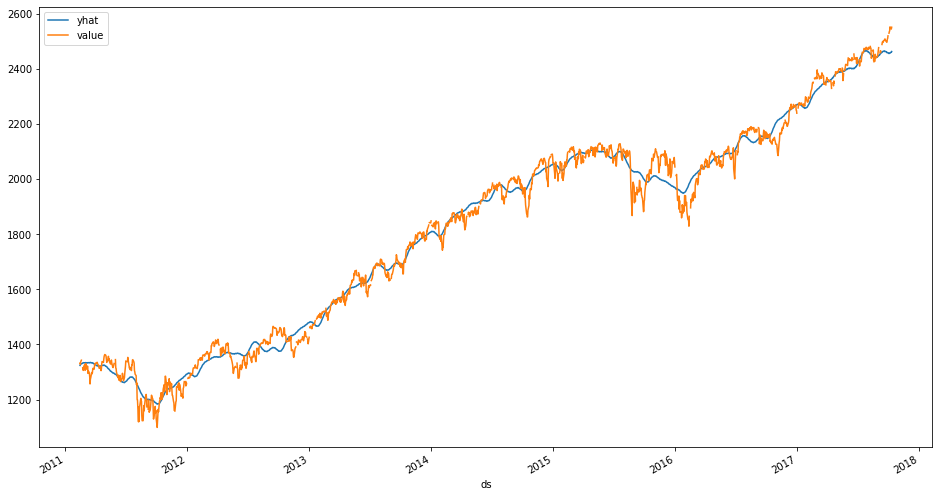

In [93]:
fig, ax = plt.subplots(figsize=(16, 9))
forecast.set_index("ds")[['yhat']].join(SP500.set_index('date')).plot(ax = ax)